In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
# create folder for result
if not os.path.exists("../result/indicator-covid-bivariate/"):
    os.makedirs("../result/indicator-covid-bivariate/")

In [3]:
# get range of COVID-19 date range & cumulative covid 19 cases

covidDP = "../clean_data/covid-19/time_series_covid19_confirmed_global.csv"
covidDF = pd.read_csv(covidDP)
covidDF["Date"] = pd.to_datetime(covidDF["Date"], format = "%Y-%m-%d")
date = covidDF["Date"].tolist()

total_cases = []
for index, row in covidDF.iterrows():
    total_cases.append([str(row[0]), row[-1]])

In [4]:
#define all FP and corresponding excluded directories
dataFP = "../clean_data/market/"
energies_dir = "Commodities/Energies"
grains_dir = "Commodities/Grains"
meats_dir = "Commodities/Meats"
metals_dir = "Commodities/Metals"
softs_dir = "Commodities/Softs"
crypto_dir = "Cryptocurrencies"
currencies_dir = "Currencies"
funds_dir = "Funds_ETFs"
index_dir = "Index"

energies_excluded_dir = ["CrudeOil_CL.csv", "CrudeOil_WTI_macrotrends.csv"]
index_excluded_dir = ["NASDAQ_100_Tech.csv", "NASDAQ_100_Index.csv",
                              "NASDAQ_100_ExTech.csv", "CBOE_VolatilityIndex.csv"]
crypto_excluded_dir = ["Tezos.csv", "EthereumClassic.csv", "NEM.csv", "Ethereum.csv"]

In [5]:
def PlotImage(root_dir, date, excluded_dir = None):
    markerStyle = ['.', ',', 'o', 'v', '^', '1', 'p', 'P', '*', '+',
                  'x', 'X', 'd', 'D', '-', '_', 'h', 'H', '<', '>']
    
    fontsize = {'size': 16}
    
    plt.figure(figsize=(15, 10))
    plt.title(root_dir, fontsize)
        
    plotNumber = 0
    for root, dirs, files in os.walk(dataFP + root_dir):
        for file in files:
            path = dataFP + root_dir + '/' + file
            if not path.endswith('.csv') or (excluded_dir is not None and file in excluded_dir):
                continue
                
            indicatorData = pd.read_csv(path)
            indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
            indicatorData.sort_values('Date', inplace=True, ascending=True)

            # Only keep data within the range of the covid data
            indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
            indicatorData = indicatorData[["Date", "Close/Last"]]
            
            total_covid = []
            record_date = indicatorData["Date"].values

            for each_date in record_date:
                for each in total_cases:
                    if str(each_date)[:10] == each[0][:10]:
                        total_covid.append(each[1])
            
            indicatorValue = indicatorData["Close/Last"].values
            base = indicatorValue[0]
            new_indicatorValue = []
            for each in indicatorValue:
                if each / base < 1:
                    new_indicatorValue.append(-100.0 * (1 - each / base))
                else:
                    new_indicatorValue.append(100.0 * (each / base - 1))
            
            plt.scatter(total_covid, new_indicatorValue, label=file[:-4], linewidth = 1, linestyle = "--", marker = markerStyle[plotNumber % 10])
            plt.xticks(fontsize = 16)
            # plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], ['-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%'], fontsize = 16)
            plt.yticks(fontsize = 16)
            plt.legend(prop = fontsize)
            # plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
            plt.xlabel('Global Confirmed Cases', fontsize)
            plt.ylabel('Rise/Fall Percentage', fontsize)
            
            plotNumber = plotNumber + 1

        root_dir = root_dir.replace("/", "_")
        picName = "../result/indicator-covid-bivariate/" + root_dir + ".png"
        plt.savefig(picName)

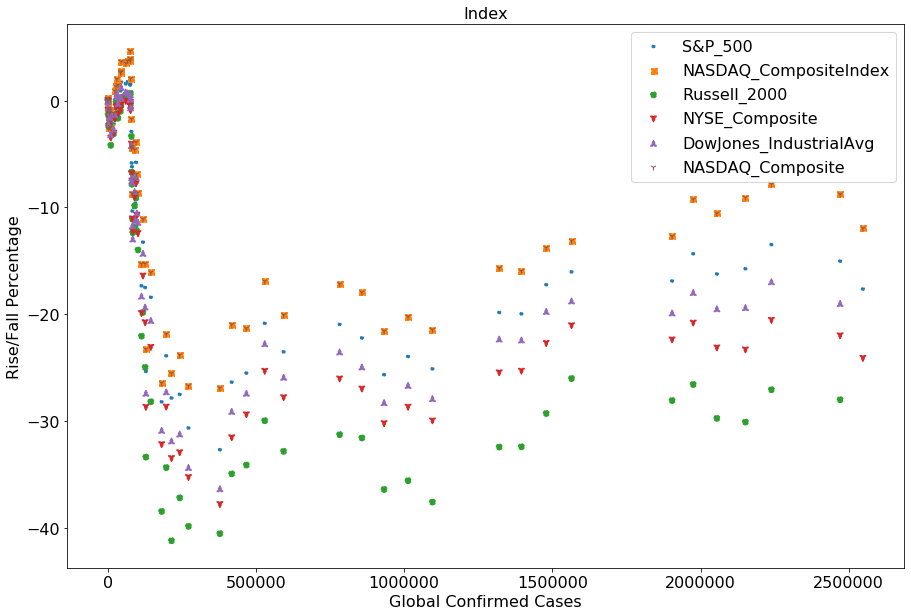

In [6]:
PlotImage(index_dir, date, index_excluded_dir)

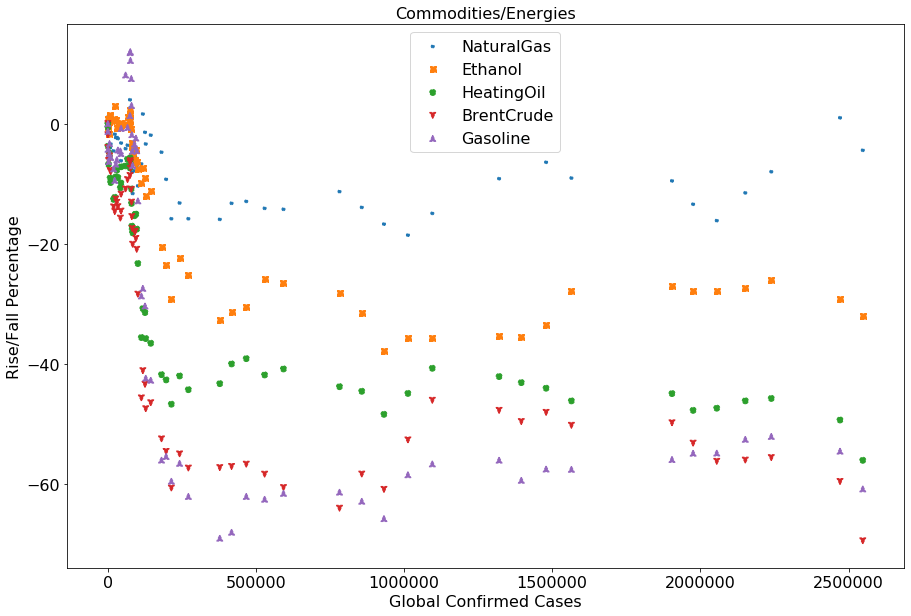

In [7]:
PlotImage(energies_dir, date, energies_excluded_dir)

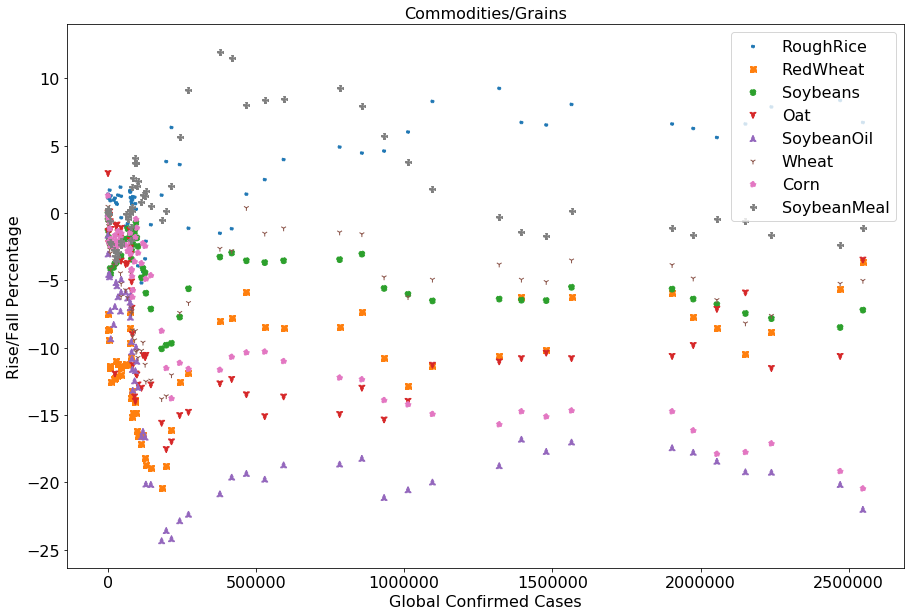

In [8]:
PlotImage(grains_dir, date)

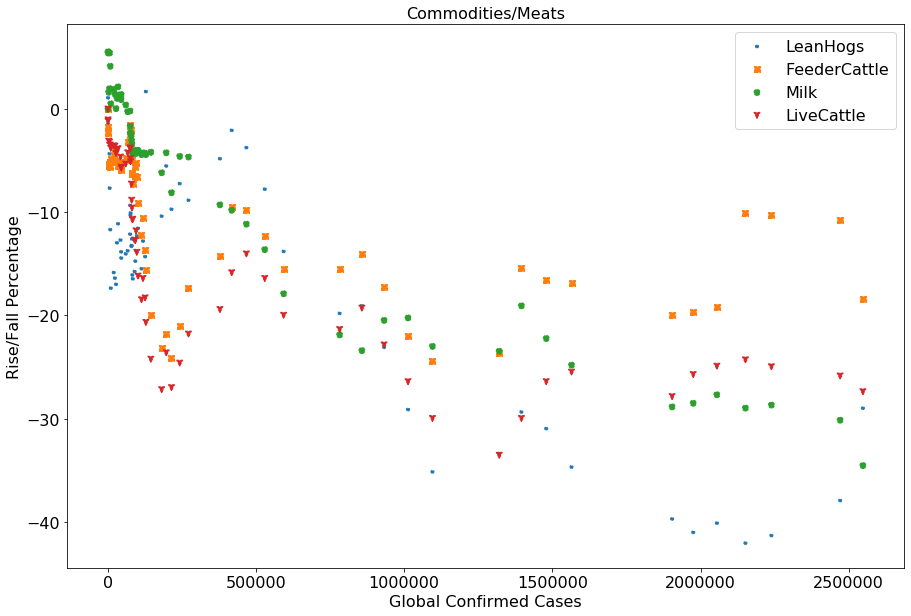

In [9]:
PlotImage(meats_dir, date)

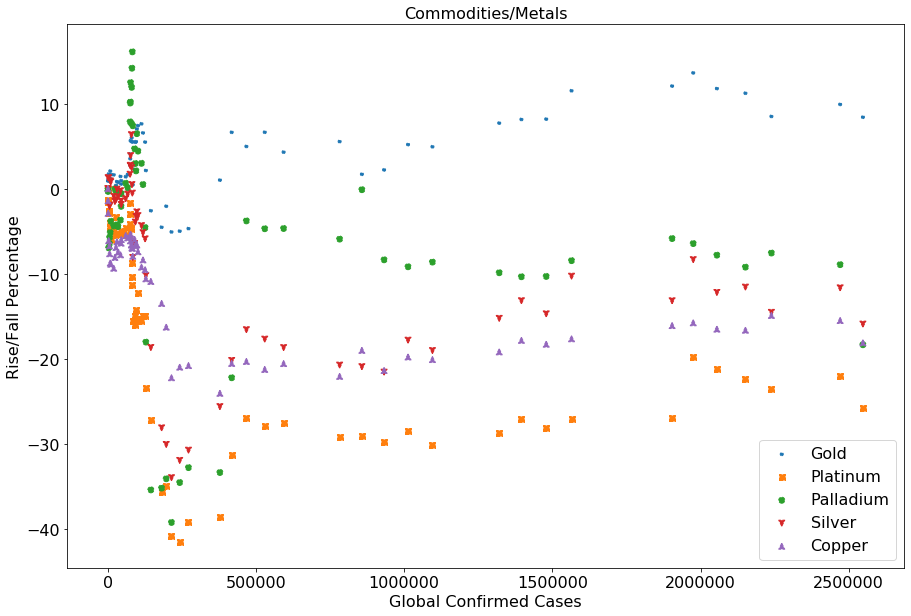

In [10]:
PlotImage(metals_dir, date)

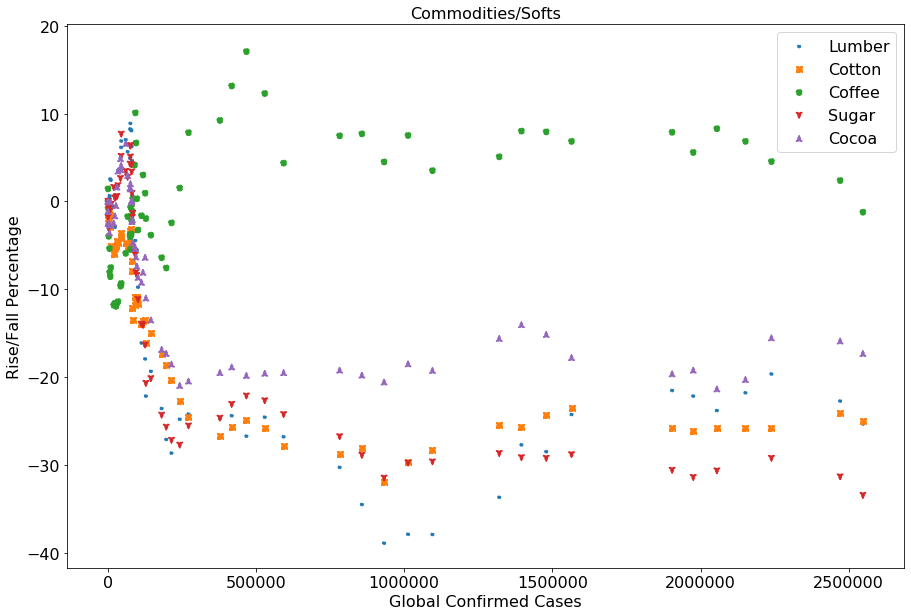

In [11]:
PlotImage(softs_dir, date)

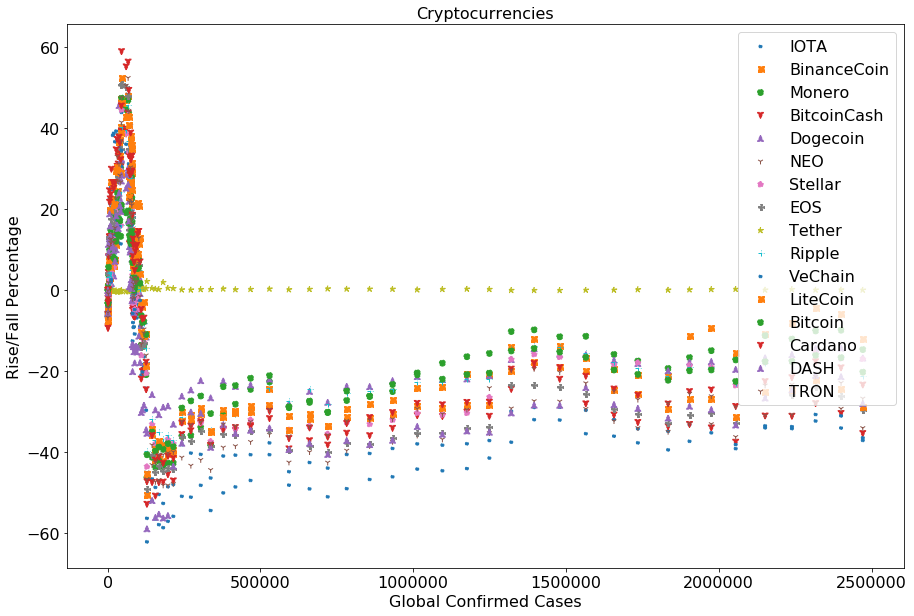

In [12]:
PlotImage(crypto_dir, date, crypto_excluded_dir)

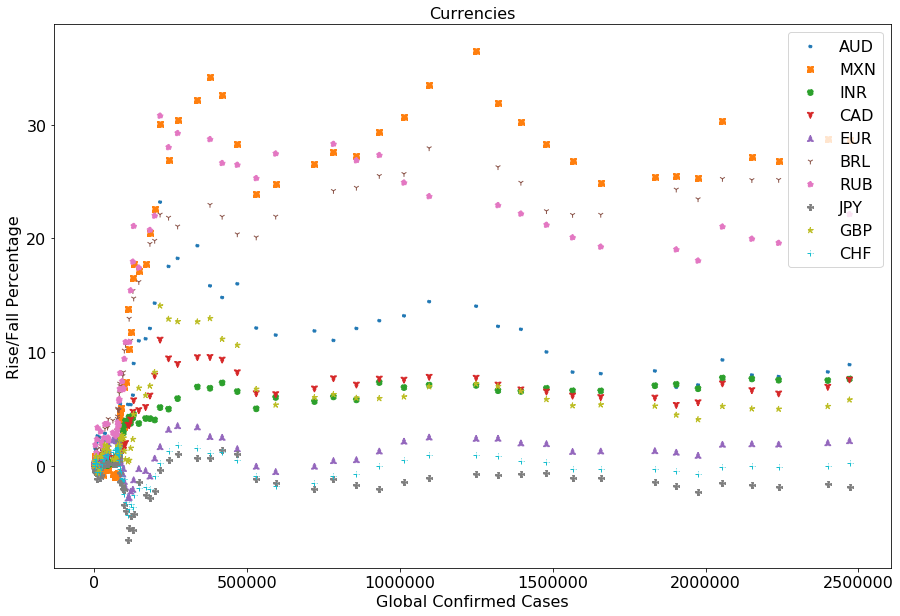

In [13]:
PlotImage(currencies_dir, date)

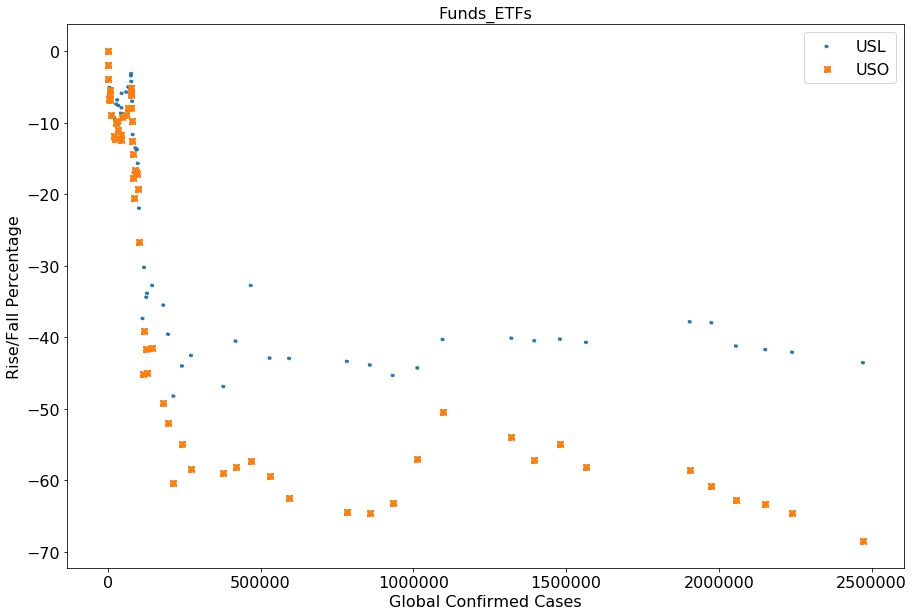

In [14]:
PlotImage(funds_dir, date)